<a href="https://colab.research.google.com/github/bidhan7/Data-Processing-Visualization-/blob/main/Visual_Amounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize Amounts



Using the [Air B&B NYC data](https://raw.githubusercontent.com/nurfnick/Data_Viz/main/AB_NYC_2019.csv) complete the following tasks.

1. Create a bar graph of the maximum 'price' by 'neighbourhood_group'.  Include the 'price' in your graph
2. Create a multiple bar graph with 'neighbourhood_group' and 'room_type' by looking at the average 'price'.

Importing pandas and grabing data from [Air B&B NYC data](https://raw.githubusercontent.com/nurfnick/Data_Viz/main/AB_NYC_2019.csv)

In [4]:
import pandas as pa

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Bar Charts

Let's make bar chart of the maximum 'price' by 'neighbourhood_group'.

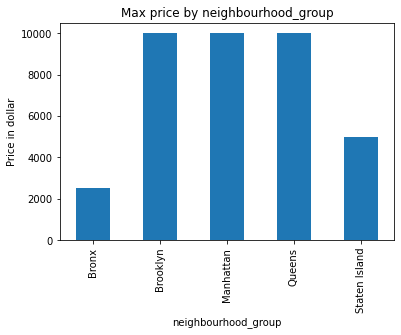

In [2]:
df.groupby('neighbourhood_group').price.agg('max').plot(kind = 'bar',
                                                 title = 'Max price by neighbourhood_group', 
                                                 ylabel= 'Price in dollar')


I didn't get the label of the values to appear. I will try that below.

In [5]:
df2 = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/AB_NYC_2019.csv')

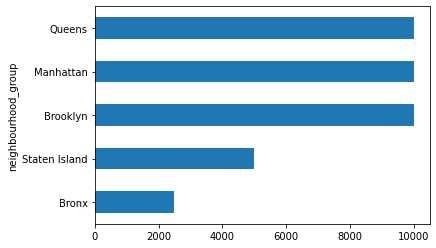

In [4]:
df2.groupby('neighbourhood_group').price.agg('max').sort_values(ascending = True).plot(kind = 'barh')

We can't figure out the exact value or label. To clear this up I will use a point instead of a bar!

## Adding Labels

It would be better to see the numbers presented with the data.  It especially nice for a small number of quantities.

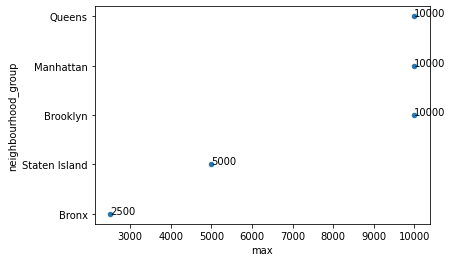

In [5]:
ax = df2.groupby('neighbourhood_group').price.agg(['max']).sort_values(by = 'max',ascending = True).reset_index().plot.scatter(x = 'max', y = 'neighbourhood_group')#this made the same graph as above.

for i,k in enumerate(df2.groupby('neighbourhood_group').price.agg(['max']).sort_values(by = 'max',ascending = True).reset_index()['max']): #here I loop through the values, k, and indicies ,i.
  ax.annotate(str(int(k)),[k,i])

## Bar Charts with Multiple Data

In [6]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 11.2 MB 5.2 MB/s 
     |████████████████████████████████| 899 kB 39.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


If you want to add labels, it should be simple but the version on colab is out of date...  I update here.

In [1]:
import matplotlib
matplotlib.__version__

'3.5.1'

Now with the correct version it is acually really easy.

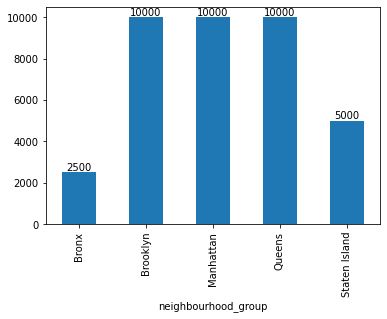

In [6]:
ax = df2.groupby('neighbourhood_group').price.agg('max').plot(kind = 'bar')

for container in ax.containers:
    ax.bar_label(container)

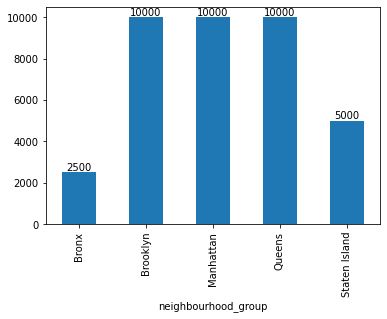

In [7]:
ax = df.groupby('neighbourhood_group').price.agg('max').plot(kind = 'bar', stacked = True)

for container in ax.containers:
    ax.bar_label(container)

Creating a bar graph with 'neighbourhood_group' and 'room_type' by looking at the average 'price'.

In [8]:
df.groupby(['neighbourhood_group','room_type']).price.agg('max')

neighbourhood_group  room_type      
Bronx                Entire home/apt     1000
                     Private room        2500
                     Shared room          800
Brooklyn             Entire home/apt    10000
                     Private room        7500
                     Shared room          725
Manhattan            Entire home/apt    10000
                     Private room        9999
                     Shared room         1000
Queens               Entire home/apt     2600
                     Private room       10000
                     Shared room         1800
Staten Island        Entire home/apt     5000
                     Private room         300
                     Shared room          150
Name: price, dtype: int64

<AxesSubplot:title={'center':'Max price by neighbourhood_group'}, xlabel='neighbourhood_group,room_type', ylabel='Price in dollar'>

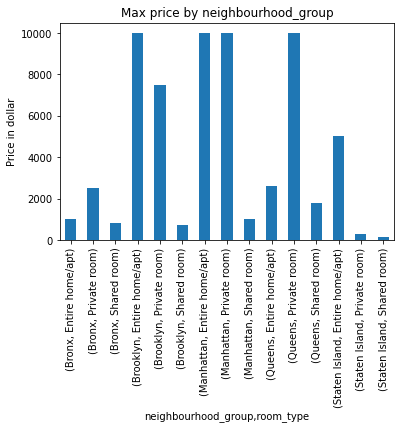

In [9]:
df.groupby(['neighbourhood_group','room_type']).price.agg('max').plot(kind = 'bar',
                                                 title = 'Max price by neighbourhood_group', 
                                                 ylabel= 'Price in dollar')

<AxesSubplot:title={'center':'Neighbourhood by Room Type'}, xlabel='room_type'>

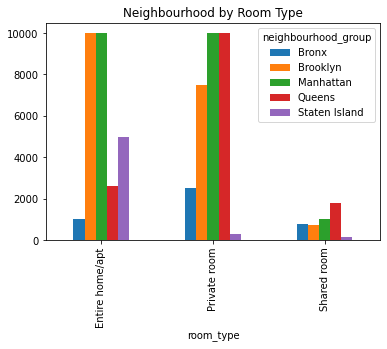

In [10]:
df_pivot = pa.pivot_table(
    df2, 
    values="price",
    index="room_type",
    columns="neighbourhood_group", 
    aggfunc=max
)

df_pivot.plot.bar(title = 'Neighbourhood by Room Type')